#Binary classification using neural networks
* Find the `pima-diabetes.csv` file in the `./data/` folder.
* Can we correctly classify `Diabetes` knowing all the input variables?

In [0]:
from google.colab import files
uploaded = files.upload()
file_name = 'pulsar_stars.csv'

Saving pulsar_stars.csv to pulsar_stars (1).csv


In [0]:
import pandas as pd
data = pd.read_csv(file_name, delimiter=',')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [0]:
import numpy as np
# Use np.loadtxt() instead when there are non-numeric values as well
dataset = np.genfromtxt(file_name, delimiter=",", skip_header = True) 

In [0]:
np.set_printoptions(precision = 2) # does not work for too wide array
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

print('')
print(dataset.shape)
print('')
print(dataset[0:5])


(17898, 9)

[[ 140.6  55.7 -0.2 -0.7  3.2  19.1  8.0  74.2  0.0]
 [ 102.5  58.9  0.5 -0.5  1.7  14.9  10.6  127.4  0.0]
 [ 103.0  39.3  0.3  1.1  3.1  21.7  7.7  63.2  0.0]
 [ 136.8  57.2 -0.1 -0.6  3.6  21.0  6.9  53.6  0.0]
 [ 88.7  40.7  0.6  1.1  1.2  11.5  14.3  252.6  0.0]]


In [0]:
X = dataset[:, :-1]
Y = dataset[:, -1]

In [0]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

#Design a neural network

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# model.add(Dense(8, input_dim = len(X[0, :]), activation='relu'))
# model.add(Dense(4, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
model.add(Dense(7, input_dim = len(X[0, :]), activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Draw the network architecture
What is the total parameters? How?

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 7)                 63        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 32        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________


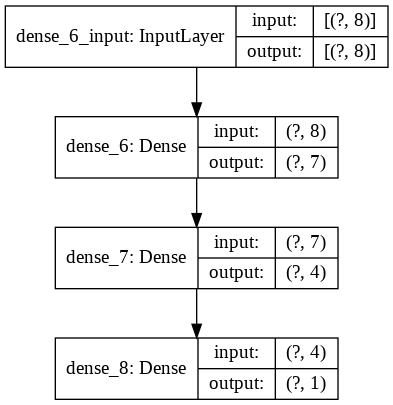

In [0]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes=True)

In [0]:
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.fit(X, Y, epochs = 256, verbose = 1)

In [0]:
print ('True Validation Data:')
print(Y[:10])
prediction = model.predict(X)
print ('Prediction:')
print(prediction[0:10].T)

True Validation Data:
[ 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0]
Prediction:
[[ 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0]]


#Evaluating binary predictions

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y, prediction.round())
precision = precision_score(Y, prediction.round())
recall = recall_score(Y, prediction.round())
f1score = f1_score(Y, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

Accuracy: 98.05%
Precision: 91.51%
Recall: 86.76%
F1-score: 0.89
